# Student Performance Analysis

This notebook analyzes and visualizes the `student-mat.csv` and `student-por.csv` datasets using pandas and matplotlib. We will explore, clean, and visualize the data to uncover insights about student performance.

## 1. Import Required Libraries

We will import pandas, numpy, matplotlib.pyplot, and seaborn for data analysis and visualization.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visuals
sns.set(style="whitegrid")
%matplotlib inline

## 2. Load the Datasets with Error Handling

Let's load `student-mat.csv` and `student-por.csv` using pandas, with error handling to manage file-related issues.

In [5]:
# Define file paths (update if your files are in a different location)
mat_path = "student-mat.csv"
por_path = "student-por.csv"

try:
    student_mat = pd.read_csv(mat_path, sep=';')
    print("Loaded student-mat.csv successfully.")
except FileNotFoundError:
    print(f"Error: {mat_path} not found.")
    student_mat = None

try:
    student_por = pd.read_csv(por_path, sep=';')
    print("Loaded student-por.csv successfully.")
except FileNotFoundError:
    print(f"Error: {por_path} not found.")
    student_por = None

Loaded student-mat.csv successfully.
Loaded student-por.csv successfully.


## 3. Inspect the First Few Rows

Let's display the first five rows of each dataset to get an initial look at the data.

In [6]:
# Display first five rows of student-mat.csv
if student_mat is not None:
    print("First five rows of student-mat.csv:")
    display(student_mat.head())

# Display first five rows of student-por.csv
if student_por is not None:
    print("First five rows of student-por.csv:")
    display(student_por.head())

First five rows of student-mat.csv:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


First five rows of student-por.csv:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## 4. Explore Dataset Structure and Missing Values

We will check the data types and identify missing values in both datasets.

In [7]:
# Check info and missing values for student-mat.csv
if student_mat is not None:
    print("student-mat.csv info:")
    student_mat.info()
    print("\nMissing values in student-mat.csv:")
    print(student_mat.isnull().sum())

# Check info and missing values for student-por.csv
if student_por is not None:
    print("\nstudent-por.csv info:")
    student_por.info()
    print("\nMissing values in student-por.csv:")
    print(student_por.isnull().sum())

student-mat.csv info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    

## 5. Clean the Datasets

Let's handle missing values by filling or dropping them as appropriate, and ensure data types are correct.

In [8]:
# Clean student-mat.csv
if student_mat is not None:
    # Drop rows with missing values (if any)
    student_mat_clean = student_mat.dropna()
    print(f"student-mat.csv: Dropped {len(student_mat) - len(student_mat_clean)} rows with missing values.")
else:
    student_mat_clean = None

# Clean student-por.csv
if student_por is not None:
    # Drop rows with missing values (if any)
    student_por_clean = student_por.dropna()
    print(f"student-por.csv: Dropped {len(student_por) - len(student_por_clean)} rows with missing values.")
else:
    student_por_clean = None

student-mat.csv: Dropped 0 rows with missing values.
student-por.csv: Dropped 0 rows with missing values.


## 6. Basic Statistical Analysis

We will compute statistics like mean, median, and standard deviation for numerical columns using `.describe()`.

In [9]:
# Describe numerical columns in student-mat.csv
if student_mat_clean is not None:
    print("Statistical summary for student-mat.csv:")
    display(student_mat_clean.describe())

# Describe numerical columns in student-por.csv
if student_por_clean is not None:
    print("Statistical summary for student-por.csv:")
    display(student_por_clean.describe())

Statistical summary for student-mat.csv:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Statistical summary for student-por.csv:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


## 7. Group and Aggregate Data

Let's group by a categorical column (e.g., 'school' or 'sex') and compute the mean of a numerical column (e.g., final grade).

In [10]:
# Group by 'school' and compute mean final grade (G3)
if student_mat_clean is not None:
    print("Average final grade (G3) by school in student-mat.csv:")
    display(student_mat_clean.groupby('school')['G3'].mean())

if student_por_clean is not None:
    print("Average final grade (G3) by school in student-por.csv:")
    display(student_por_clean.groupby('school')['G3'].mean())

# Group by 'sex' and compute mean final grade (G3)
if student_mat_clean is not None:
    print("Average final grade (G3) by sex in student-mat.csv:")
    display(student_mat_clean.groupby('sex')['G3'].mean())

if student_por_clean is not None:
    print("Average final grade (G3) by sex in student-por.csv:")
    display(student_por_clean.groupby('sex')['G3'].mean())

Average final grade (G3) by school in student-mat.csv:


school
GP    10.489971
MS     9.847826
Name: G3, dtype: float64

Average final grade (G3) by school in student-por.csv:


school
GP    12.576832
MS    10.650442
Name: G3, dtype: float64

Average final grade (G3) by sex in student-mat.csv:


sex
F     9.966346
M    10.914439
Name: G3, dtype: float64

Average final grade (G3) by sex in student-por.csv:


sex
F    12.253264
M    11.406015
Name: G3, dtype: float64

## 8. Line Chart: Trends Over Time

Let's create a line chart to show trends, such as average grades over study time.

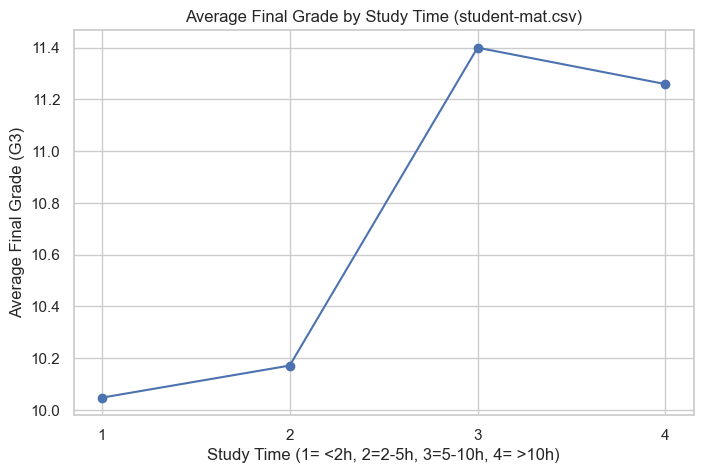

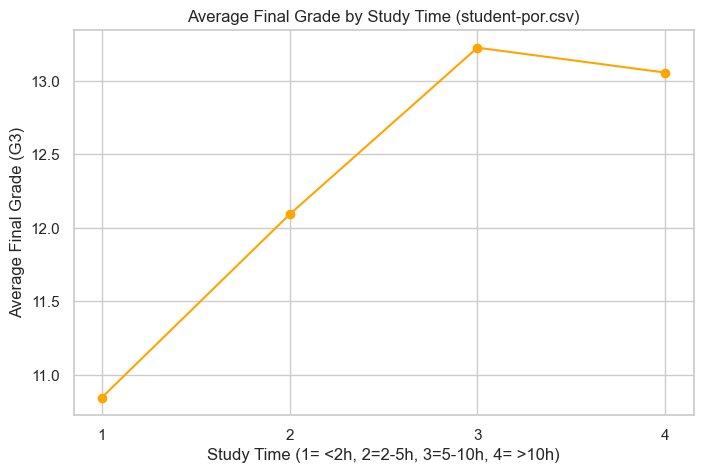

In [11]:
# Line chart: Average final grade (G3) by study time
if student_mat_clean is not None:
    plt.figure(figsize=(8, 5))
    mat_studytime = student_mat_clean.groupby('studytime')['G3'].mean()
    mat_studytime.plot(marker='o')
    plt.title('Average Final Grade by Study Time (student-mat.csv)')
    plt.xlabel('Study Time (1= <2h, 2=2-5h, 3=5-10h, 4= >10h)')
    plt.ylabel('Average Final Grade (G3)')
    plt.xticks(mat_studytime.index)
    plt.show()

if student_por_clean is not None:
    plt.figure(figsize=(8, 5))
    por_studytime = student_por_clean.groupby('studytime')['G3'].mean()
    por_studytime.plot(marker='o', color='orange')
    plt.title('Average Final Grade by Study Time (student-por.csv)')
    plt.xlabel('Study Time (1= <2h, 2=2-5h, 3=5-10h, 4= >10h)')
    plt.ylabel('Average Final Grade (G3)')
    plt.xticks(por_studytime.index)
    plt.show()

## 9. Bar Chart: Comparison Across Categories

We will create a bar chart comparing average grades across categories like school or sex.

C:\Users\user\AppData\Local\Temp\ipykernel_17268\427812207.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='school', y='G3', data=student_mat_clean, ci=None)


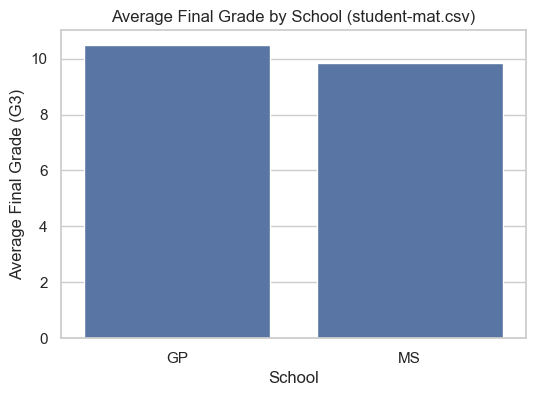

C:\Users\user\AppData\Local\Temp\ipykernel_17268\427812207.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='school', y='G3', data=student_por_clean, ci=None, palette='Set2')
C:\Users\user\AppData\Local\Temp\ipykernel_17268\427812207.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='school', y='G3', data=student_por_clean, ci=None, palette='Set2')


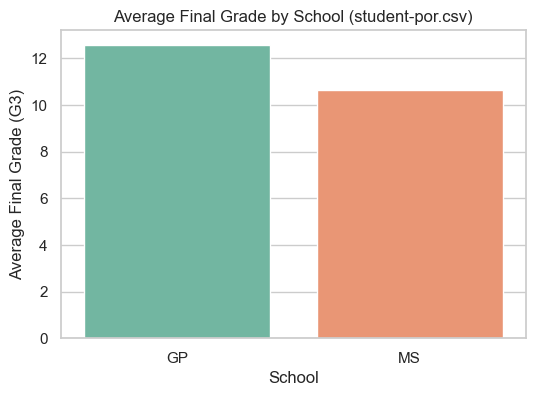

In [12]:
# Bar chart: Average final grade by school
if student_mat_clean is not None:
    plt.figure(figsize=(6, 4))
    sns.barplot(x='school', y='G3', data=student_mat_clean, ci=None)
    plt.title('Average Final Grade by School (student-mat.csv)')
    plt.xlabel('School')
    plt.ylabel('Average Final Grade (G3)')
    plt.show()

if student_por_clean is not None:
    plt.figure(figsize=(6, 4))
    sns.barplot(x='school', y='G3', data=student_por_clean, ci=None, palette='Set2')
    plt.title('Average Final Grade by School (student-por.csv)')
    plt.xlabel('School')
    plt.ylabel('Average Final Grade (G3)')
    plt.show()

## 10. Histogram: Distribution of a Numerical Column

Let's plot a histogram to visualize the distribution of final grades.

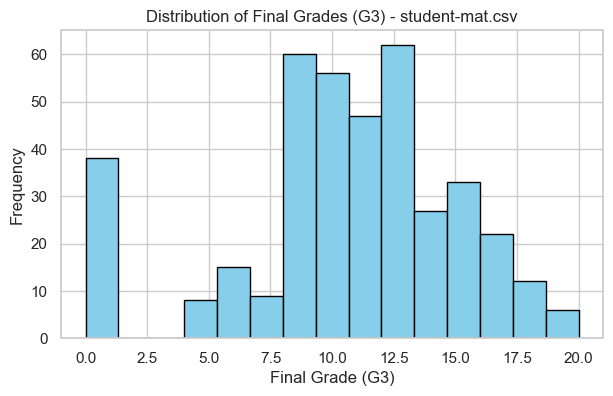

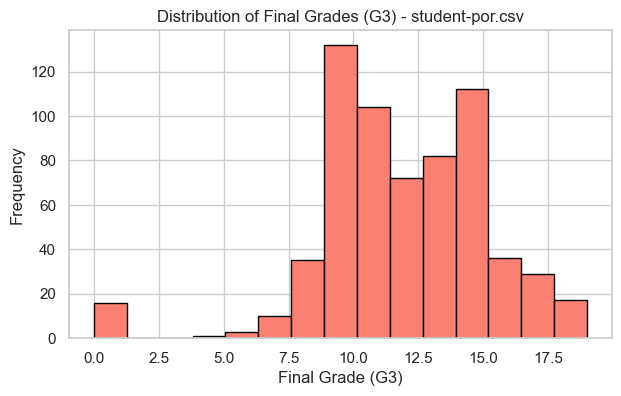

In [13]:
# Histogram of final grades (G3)
if student_mat_clean is not None:
    plt.figure(figsize=(7, 4))
    plt.hist(student_mat_clean['G3'], bins=15, color='skyblue', edgecolor='black')
    plt.title('Distribution of Final Grades (G3) - student-mat.csv')
    plt.xlabel('Final Grade (G3)')
    plt.ylabel('Frequency')
    plt.show()

if student_por_clean is not None:
    plt.figure(figsize=(7, 4))
    plt.hist(student_por_clean['G3'], bins=15, color='salmon', edgecolor='black')
    plt.title('Distribution of Final Grades (G3) - student-por.csv')
    plt.xlabel('Final Grade (G3)')
    plt.ylabel('Frequency')
    plt.show()

## 11. Scatter Plot: Relationship Between Two Numerical Columns

We will create a scatter plot to visualize the relationship between study time and final grade.

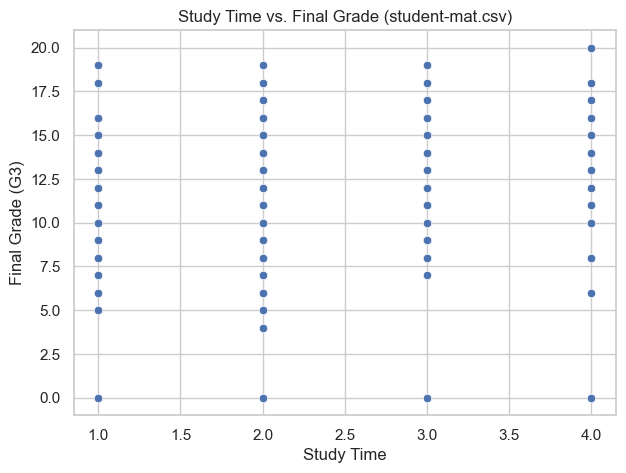

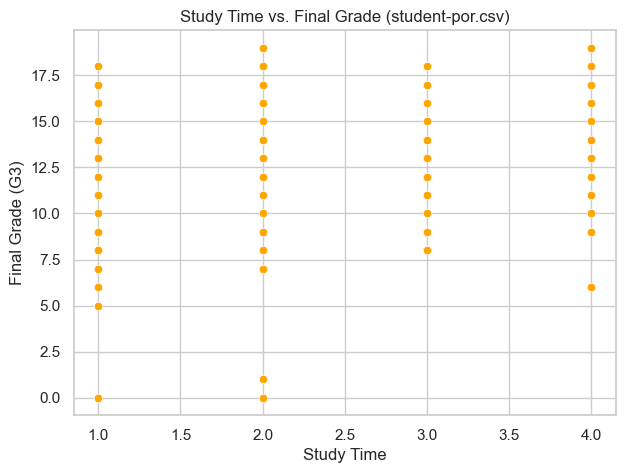

In [14]:
# Scatter plot: Study time vs. final grade
if student_mat_clean is not None:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x='studytime', y='G3', data=student_mat_clean)
    plt.title('Study Time vs. Final Grade (student-mat.csv)')
    plt.xlabel('Study Time')
    plt.ylabel('Final Grade (G3)')
    plt.show()

if student_por_clean is not None:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x='studytime', y='G3', data=student_por_clean, color='orange')
    plt.title('Study Time vs. Final Grade (student-por.csv)')
    plt.xlabel('Study Time')
    plt.ylabel('Final Grade (G3)')
    plt.show()